# ◆画像処理
・画像の読み込み

・サイズ表示

・画像の行列表示

・openCVで読み込んだ画像の変換

・画像表示

・画像リサイズ

・グレースケール変換

・画像の読み込み( pillowモジュール)

・画像の切り出し

・画像の平滑化

・画像の輝度値の変換

・配列から画像を自作

・matplotlibを使った画像の表示

・画像の保存

・画像の変換

・画像の輝度値の抽出とヒストグラム表示

・複数画像の表示

・花弁抽出

    ・HSV分割
    ・画像のマスキング
    
 
 ・輪郭抽出
 
     ・二値化
  
     ・白黒反転
     
     ・輪郭座標の抽出
     
     ・外接矩形の抽出
     
     ・外接矩形、中心座標の描写
  
 ・膨張・収縮
 
 ・オープニング
 
 ・クロージング
 
 ・トップハット
 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#カラー画像を準備
file_to_read = "\neko_sample.jpg"


None


TypeError: Image data of dtype object cannot be converted to float

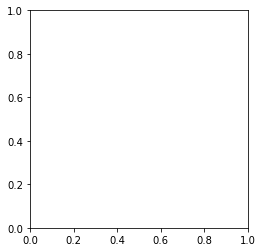

In [3]:
#openCVを用いて画像を読み込み
img = cv2.imread(file_to_read)
print(img)
plt.imshow(img)#　画像openCVはBGR、matplotlibはRGBで読み込むので色がおかしい 

In [15]:
#縦のサイズ,横のサイズ,チャネルの数
print(img.shape)

(3264, 4896, 3)


In [16]:
#読み込んだ画像の行列表示
print(img)

[[[114 132 143]
  [115 133 144]
  [116 134 145]
  ...
  [ 51  86  90]
  [ 54  86  91]
  [ 52  84  89]]

 [[115 133 144]
  [115 133 144]
  [116 134 145]
  ...
  [ 51  86  90]
  [ 52  87  91]
  [ 51  86  90]]

 [[117 133 145]
  [116 132 144]
  [116 133 142]
  ...
  [ 50  85  89]
  [ 51  86  90]
  [ 50  85  89]]

 ...

 [[167 180 194]
  [168 181 195]
  [169 182 196]
  ...
  [155 174 177]
  [155 174 179]
  [156 175 180]]

 [[165 180 196]
  [165 180 196]
  [166 182 195]
  ...
  [159 178 181]
  [159 178 183]
  [160 179 184]]

 [[164 180 196]
  [165 181 197]
  [165 181 197]
  ...
  [161 180 183]
  [161 180 185]
  [161 180 185]]]


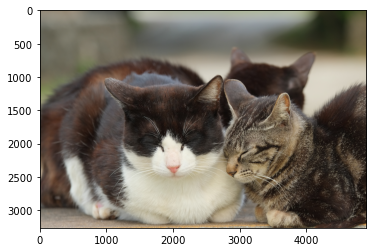

In [17]:
#画像をRGB表示に変換
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)

In [18]:
#縦のサイズ,横のサイズ,チャネルの数
print(img2.shape)#縦,横,チャネル

(3264, 4896, 3)


In [19]:
print(img2)

[[[143 132 114]
  [144 133 115]
  [145 134 116]
  ...
  [ 90  86  51]
  [ 91  86  54]
  [ 89  84  52]]

 [[144 133 115]
  [144 133 115]
  [145 134 116]
  ...
  [ 90  86  51]
  [ 91  87  52]
  [ 90  86  51]]

 [[145 133 117]
  [144 132 116]
  [142 133 116]
  ...
  [ 89  85  50]
  [ 90  86  51]
  [ 89  85  50]]

 ...

 [[194 180 167]
  [195 181 168]
  [196 182 169]
  ...
  [177 174 155]
  [179 174 155]
  [180 175 156]]

 [[196 180 165]
  [196 180 165]
  [195 182 166]
  ...
  [181 178 159]
  [183 178 159]
  [184 179 160]]

 [[196 180 164]
  [197 181 165]
  [197 181 165]
  ...
  [183 180 161]
  [185 180 161]
  [185 180 161]]]


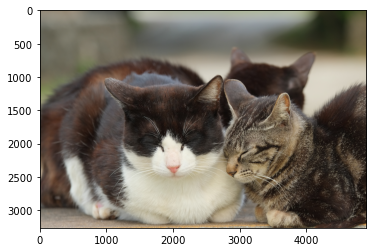

In [20]:
plt.imshow(img2)

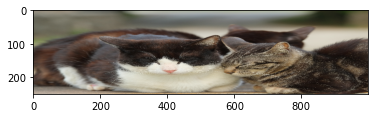

In [21]:
img3 = cv2.resize(img2,(1000,250)) #横,縦
plt.imshow(img3)

In [22]:
#サイズを変更後の画像を保存
save_resized_image = "resized_image.jpg"
plt.imsave(save_resized_image, img3)

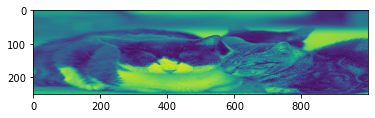

In [23]:
#画像をグレースケールに変換
img4 = cv2.cvtColor(img3,cv2.COLOR_RGB2GRAY)
plt.imshow(img4)

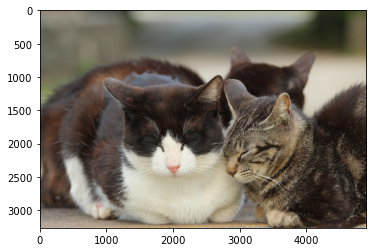

In [24]:
#画像を読み込む他の方法 pillowモジュール
from PIL import Image 
im= Image.open(file_to_read)
plt.imshow(im)

In [25]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4896x3264 at 0x1EF88B493D0>


In [26]:
#pillowモジュールで読み込んだファイルをopenCVで扱うための処理
im2 = np.asarray(im)

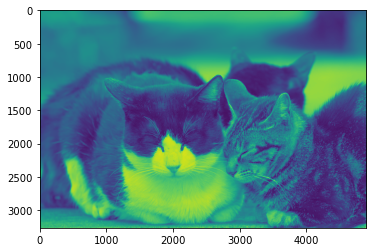

In [27]:
im2 = cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)
plt.imshow(im2)

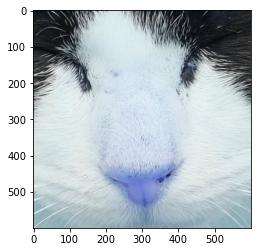

In [28]:
#画像の切り取り
min_im2 = img[1900:2500,1700:2300]#y方向,ｘ方向
plt.imshow(min_im2)

In [29]:
#画像の平滑化
#ガウシアンブラー
gaussianblur_im2 = cv2.GaussianBlur(min_im2,(15,15),3)#ガウシアンの標準偏差値sigmaX,sigmaXをともに0を指定

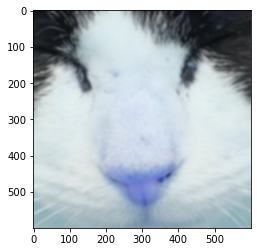

In [30]:
#画像表示
plt.imshow(gaussianblur_im2)

In [31]:
#画像保存
save_resized_image = "gaussian_image.jpg"
plt.imsave(save_resized_image, gaussianblur_im2)

[[0.         0.16666667 0.        ]
 [0.16666667 0.         0.16666667]
 [0.16666667 0.16666667 0.16666667]]


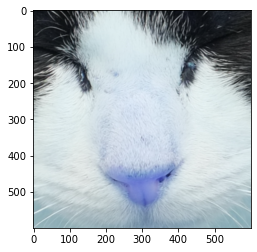

In [32]:
#自作のフィルタ処理
filter = np.array([[0,1,0],[1,0,1],[1,1,1]])/6
filter = filter.reshape(3,3)
print(filter)
dst = cv2.filter2D(min_im2,-1,filter)#-1は入力と出力の方を指定する
plt.imshow(dst)

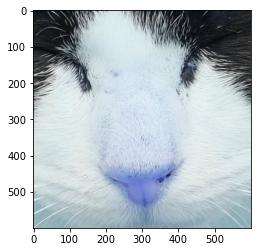

In [33]:
#再度読み込み
min_im2 = img[1900:2500,1700:2300]#y方向,ｘ方向
plt.imshow(min_im2)

In [34]:
#読み込んだ画像の一部の輝度を置換
min_im2[200:400,200:400] = 0

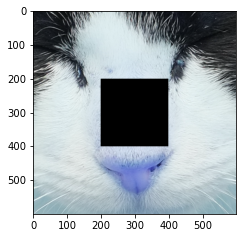

In [35]:
#置換した結果を表示
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(min_im2)

In [36]:
#配列から画像を自作
data1 = [[0,20,30,50,70,100,150,180,200,255],[0,0,0,0,0,0,0,0,0,0]]
data2 = [[0,20,30,50,70,100,150,180,200,255],[0,0,0,0,0,0,0,0,0,0],[255,255,255,255,255,255,255,255,255,255]]
print(type(data1))#型をチェック
print(type(data2))#型をチェック
data1 = np.array(data1)#型をnumpy配列(ndarray)に変換
data2 = np.array(data2)#型をnumpy配列(ndarray)に変換
print(type(data1))
print(type(data2))

<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


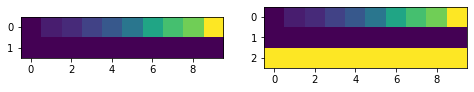

In [37]:
#画像として表示
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(data1)
ax2 = fig.add_subplot(122)
plt.imshow(data2)

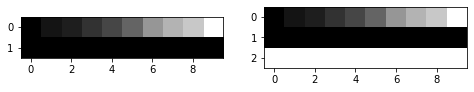

In [38]:
#画像として表示
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(data1,cmap="gray")
ax2 = fig.add_subplot(122)
plt.imshow(data2,cmap="gray")

In [39]:
#画像保存
save_gray_image = "data1_image.jpg"
plt.imsave(save_gray_image,data1)

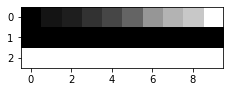

In [40]:
#置換した結果を表示
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(data2,cmap="gray")

In [41]:
#画像の一部の輝度を置換
data2[0:3,4:6] = 255

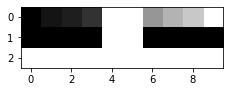

In [42]:
#置換した結果を表示
fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(data2,cmap="gray")

In [43]:
#画像から輝度値を取得してヒストグラムを作成
#画像を準備
file_to_read = "neko_sample.jpg"
#openCVを用いて画像をグレースケールで読み込み
img = cv2.imread(file_to_read,0)#0⇒グレースケール
print(img.shape)
print(type(img))
#配列を一次元に変更
data =img.ravel()
print(data)
print(data.shape)
print("len(data):",len(data))

(3264, 4896)
<class 'numpy.ndarray'>
[133 134 135 ... 179 179 179]
(15980544,)
len(data): 15980544


Text(0, 0.5, 'num of pixels')

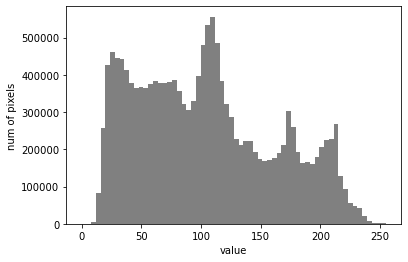

In [44]:
plt.hist(data,bins = 64,color = "gray")
plt.xlabel("value")
plt.ylabel("num of pixels")

(array([2.09000e+02, 3.14000e+02, 4.48000e+02, 2.62600e+03, 1.10350e+04,
        7.51850e+04, 1.03148e+05, 2.50432e+05, 2.16309e+05, 3.44905e+05,
        3.43982e+05, 2.22942e+05, 3.30288e+05, 2.21617e+05, 3.13252e+05,
        1.97099e+05, 2.81518e+05, 1.83208e+05, 2.73900e+05, 1.83762e+05,
        2.74057e+05, 2.75018e+05, 1.87333e+05, 2.88920e+05, 1.89898e+05,
        2.84271e+05, 1.89627e+05, 2.82322e+05, 1.88439e+05, 2.91867e+05,
        2.87136e+05, 1.82091e+05, 2.57072e+05, 1.60238e+05, 2.32732e+05,
        1.51573e+05, 2.40394e+05, 1.85593e+05, 3.02610e+05, 2.28320e+05,
        3.83005e+05, 4.01485e+05, 2.80141e+05, 4.06781e+05, 2.40747e+05,
        3.17593e+05, 1.79302e+05, 2.45283e+05, 1.48475e+05, 2.12678e+05,
        1.75205e+05, 1.05156e+05, 1.59274e+05, 1.11015e+05, 1.68452e+05,
        1.11155e+05, 1.58298e+05, 9.05170e+04, 1.31291e+05, 8.57010e+04,
        1.26040e+05, 1.28520e+05, 8.78890e+04, 1.33614e+05, 9.30030e+04,
        1.48700e+05, 1.04725e+05, 1.91918e+05, 1.66

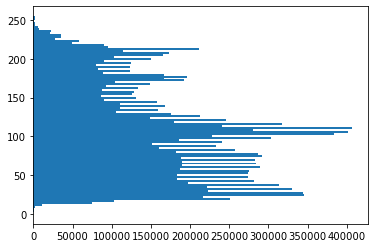

In [45]:
plt.hist(data, orientation="horizontal",bins = 100)

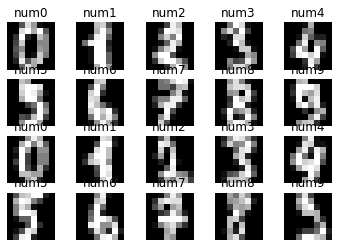

In [46]:
#複数の画像を並べて出力する(別法)
#手書きデータ読み込み
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

for i in range(0,20):
    plt.subplot(4,5,i+1)#4行5列のi+1番目に表示
    #plt.axis("on")
    plt.axis("off")
    plt.title("num"+str(digits.target[i]))
    plt.imshow(digits.images[i],cmap = "gray")

Text(0.5, 1.0, 'after HSV conversion')

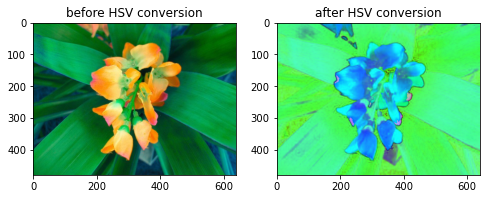

In [47]:
#画像の変換
import cv2
import matplotlib.pyplot as plt
file_to_read = "flower_color.jpg"
img = cv2.imread(file_to_read)

fig=plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(121)
plt.imshow(img)
plt.title("before HSV conversion")

img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
ax1 = fig.add_subplot(122)
plt.imshow(img_hsv)
plt.title("after HSV conversion")

(-0.5, 639.5, 479.5, -0.5)

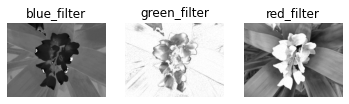

In [48]:
#画像のフィルタリング
blue_img , green_img , red_img = cv2.split(img_hsv)
fig1= plt.figure()
ax1 = fig1.add_subplot(131)
plt.imshow(blue_img, cmap ="gray")
plt.title("blue_filter")
plt.axis("off")

ax1 = fig1.add_subplot(132)
plt.imshow(green_img,cmap ="gray")
plt.title("green_filter")
plt.axis("off")

ax1 = fig1.add_subplot(133)
plt.imshow(red_img,cmap ="gray")
plt.title("red_filter")
plt.axis("off")

In [49]:
#形状確認
print(blue_img.shape)

(480, 640)


In [50]:
#輝度値確認
print(blue_img)

[[ 61  62  61 ...  62  60  60]
 [ 62  62  62 ...  62  61  61]
 [ 63  63  63 ...  63  63  62]
 ...
 [ 67  67  68 ... 101 102 102]
 [ 66  67  67 ... 101 102 102]
 [ 66  67  67 ... 102 102 103]]


0
10
20
30
40
50
60
70
80
90


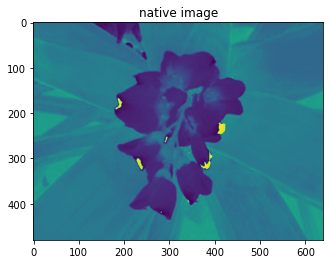

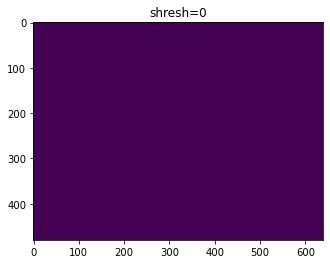

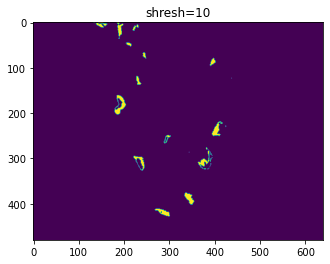

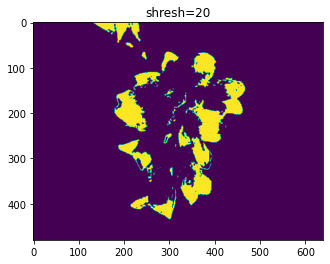

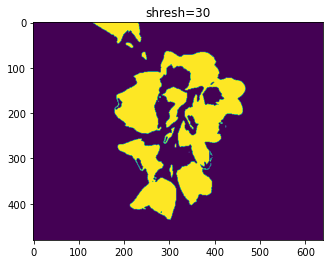

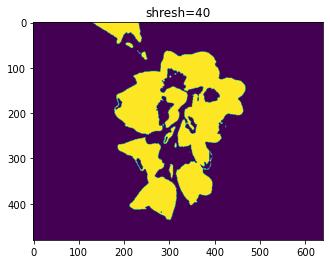

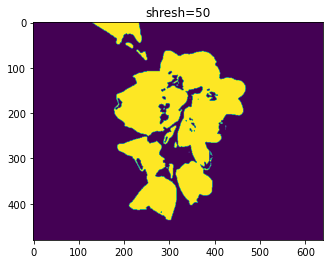

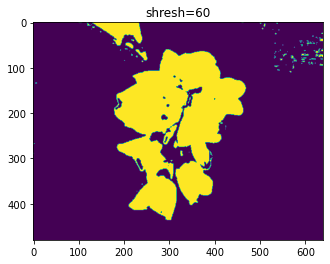

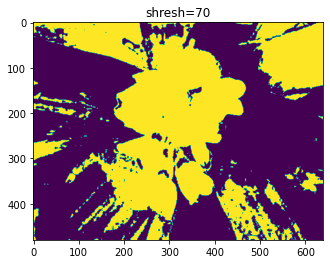

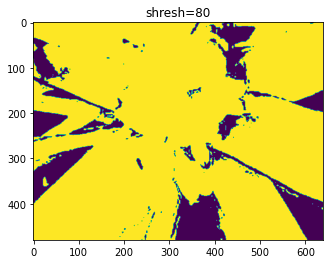

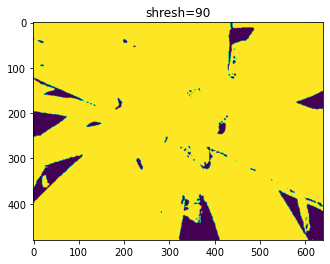

In [51]:
plt.imshow(blue_img)
plt.title("native image")
blue_img_list = []
for shresh in range(0,100,10):
    print(shresh)
    blue_img2 = np.where(blue_img<shresh,255,0)#blue_img2で輝度値35未満を255(白)へ変換、35以上を0(黒)に変換
    fig3= plt.figure()
    ax1 = fig3.add_subplot(111)
    plt.imshow(blue_img2)
    plt.title("shresh="+str(shresh))

In [52]:
#上記で求めたshreshを用いてマスキング画像を作成 1 or 0
mask_image = np.where(blue_img<50,1,0)#輝度値50未満を1へ変換、50以上を0(黒)に変換
print(mask_image)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


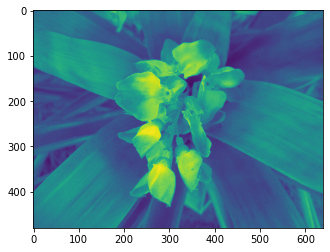

In [53]:
#花弁抽出(グレースケール)
#大元の画像を再度読み込み
file_to_read = "flower_color.jpg"
source = cv2.imread(file_to_read,0)#グレースケールで読みこみ
plt.imshow(source)

(480, 640)


True

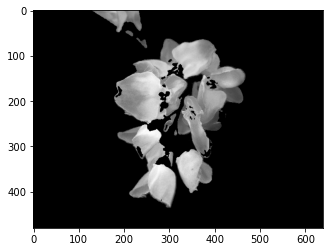

In [54]:
#マスキング画像を重ね合わせることで花の部分を抽出
extracted = source*mask_image
plt.imshow(extracted,cmap = "gray")
print(extracted.shape)
cv2.imwrite("extracted_flower.png",extracted)

# 輪郭抽出

In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

#画像の表示を定義　ndarray 配列をインラインで Notebook 上に表示する。
def imshow(img):
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

In [56]:
#画像読み込み
sample= "sample4.png"
img = cv2.imread(sample, cv2.IMREAD_GRAYSCALE)
#二値化
ret,thresh = cv2.threshold(img,127,255,0)

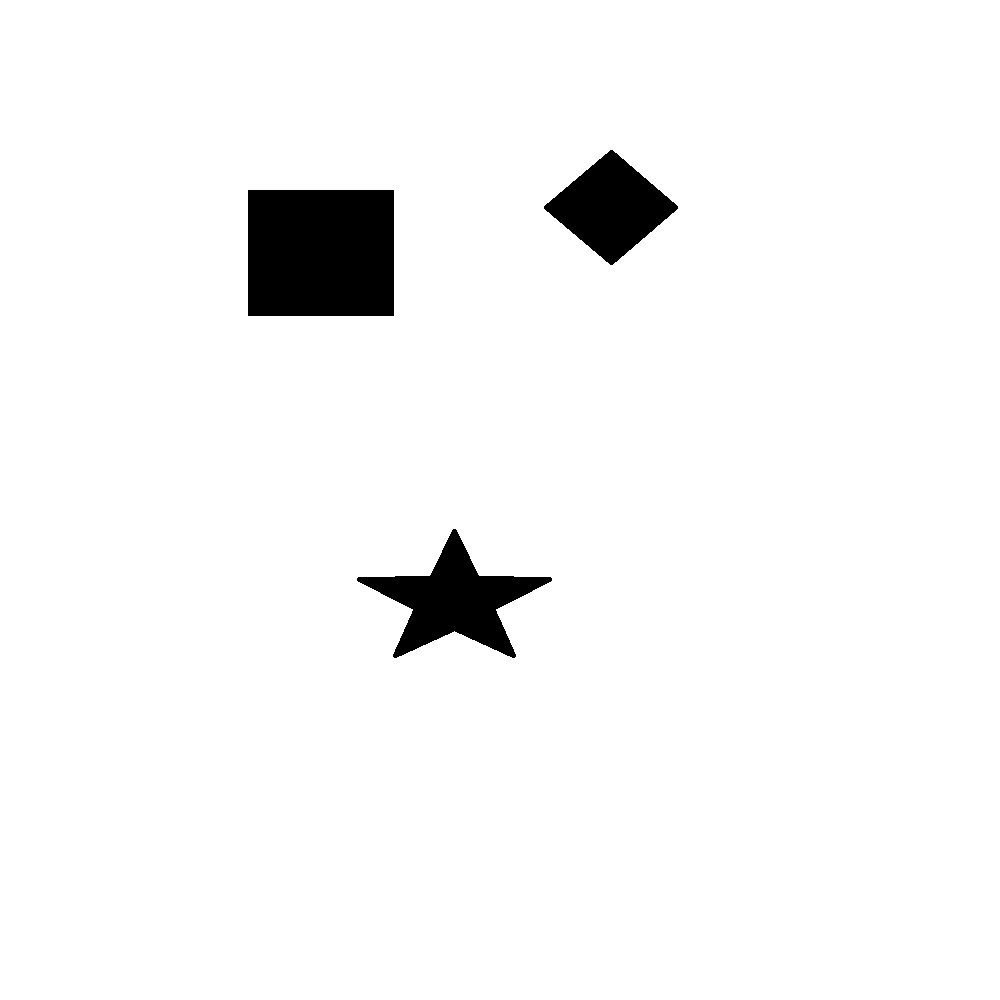

In [57]:
imshow(thresh)

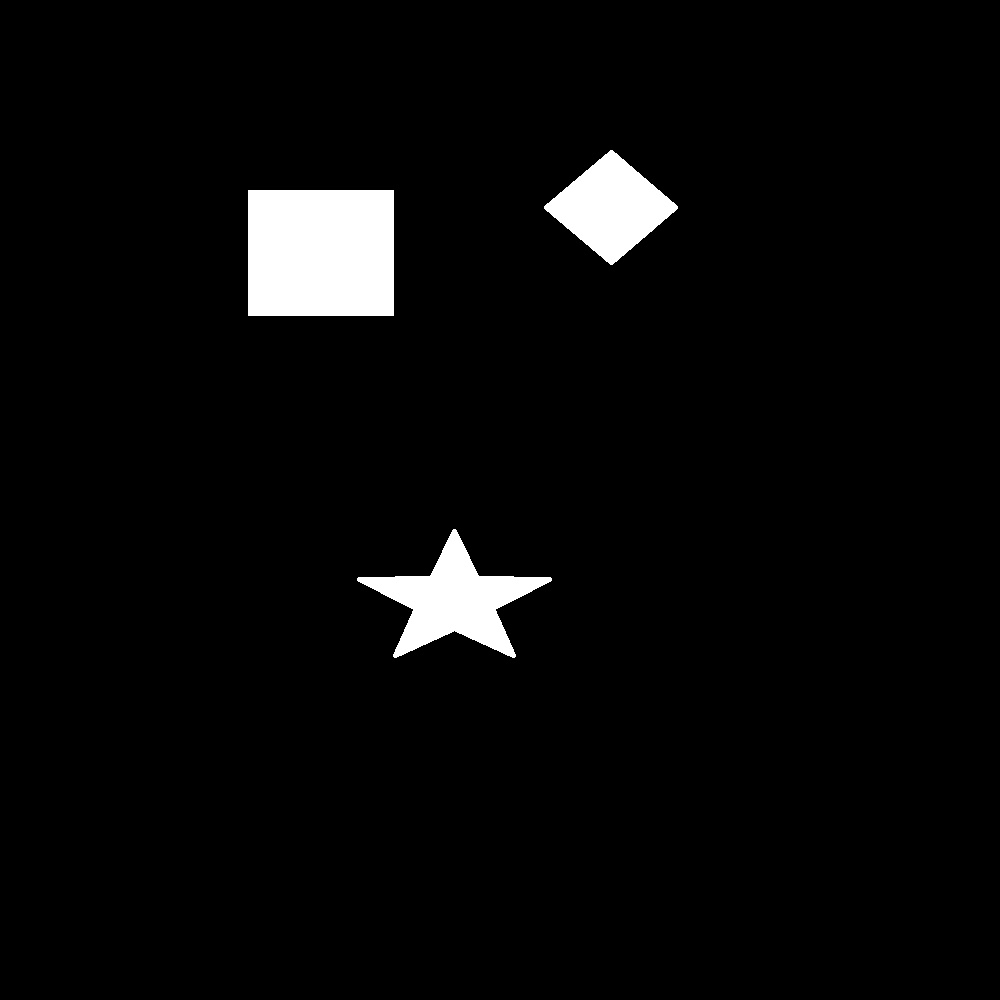

In [58]:
#前処理
#輪郭抽出を実施する場合、背景を黒(輝度値0)にする。
thresh = cv2.bitwise_not(thresh) 
imshow(thresh)

## 輪郭抽出を行う関数findContours
contours, hierarchy = cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])

image: 入力画像 (8bit、1チャンネル)。非0の画素は1とした2値画像として扱われる。

mode: 輪郭を検索する方法を指定する。

method: 輪郭を近似する方法を指定する。

offset: 返り値の輪郭の点にオフセットを加算したい場合は指定する。

返り値

contours: 抽出された輪郭のリスト。各輪郭は (NumPoints, 1, 2) の numpy 配列。

hierarchy: 階層構造のリスト。(1, NumContours, 4) の numpy 配列。


In [60]:
#輪郭抽出
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

[array([[[453, 529]],

       [[452, 530]],

       [[452, 531]],

       [[451, 532]],

       [[451, 533]],

       [[450, 534]],

       [[450, 535]],

       [[449, 536]],

       [[449, 537]],

       [[448, 538]],

       [[448, 539]],

       [[447, 540]],

       [[447, 541]],

       [[446, 542]],

       [[446, 543]],

       [[445, 544]],

       [[445, 545]],

       [[444, 546]],

       [[444, 547]],

       [[443, 548]],

       [[443, 549]],

       [[442, 550]],

       [[442, 552]],

       [[441, 553]],

       [[441, 554]],

       [[440, 555]],

       [[440, 556]],

       [[439, 557]],

       [[439, 558]],

       [[438, 559]],

       [[438, 560]],

       [[437, 561]],

       [[437, 562]],

       [[436, 563]],

       [[436, 564]],

       [[435, 565]],

       [[435, 566]],

       [[434, 567]],

       [[434, 568]],

       [[433, 569]],

       [[433, 570]],

       [[432, 571]],

       [[432, 572]],

       [[431, 573]],

       [[431, 574]],

       [[

In [61]:
#輪郭を元画像に灰色で描画
for i in range(len(contours)):     
    cv2.drawContours(img, contours, i, (125,125, 125), 10)  

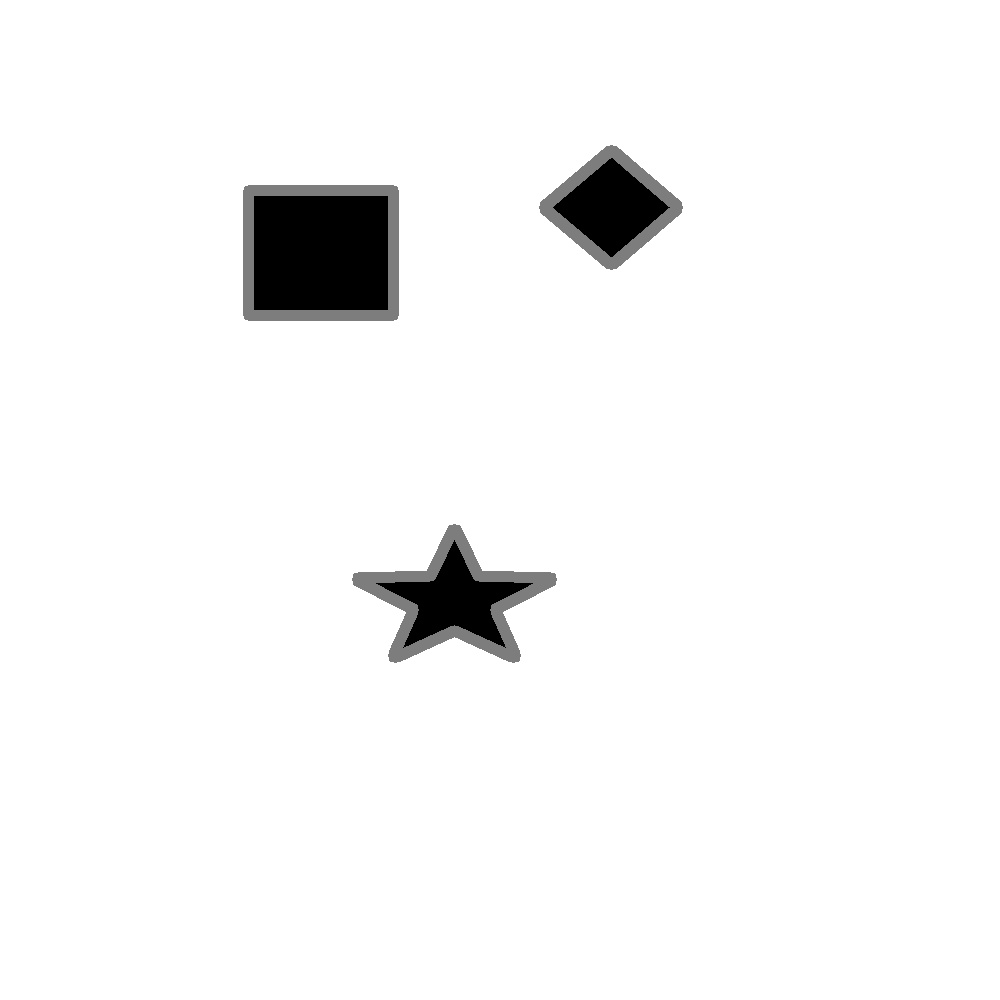

In [62]:
imshow(img)

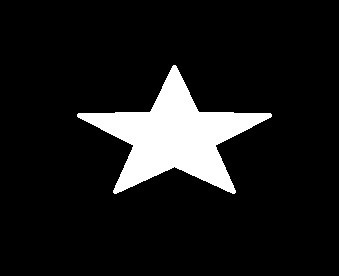

77 65 195 129


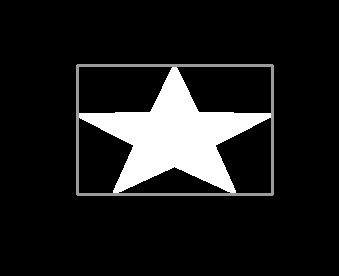

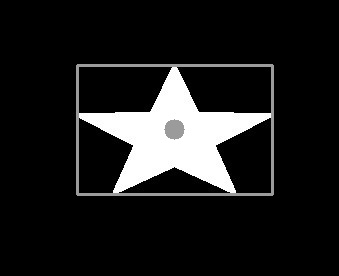

In [63]:
#輪郭抽出(外接矩形,黒背景かつ、対象オブジェクト1個)

#画像読み込み
sample2= "sample6.png"
img2 = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)
imshow(img2)
#二値化
ret,thresh = cv2.threshold(img2,127,255,0)

#外接矩形の左上座標(x,y)と各辺の長さ
x,y,w,h = cv2.boundingRect(thresh)
print(x,y,w,h)
img3 = cv2.rectangle(img2,(x,y),(x+w,y+h),(155,155,155),2)
imshow(img3)

#中心座標(X,Y)
X = int(x + 1/2*w)#整数に変換
Y = int(y + 1/2*h)#整数に変換
#中心描画
img4 = cv2.circle(img2,(X,Y),10,(155,155,155),cv2.FILLED)#対象、座標、半径、色、内部の表示方法cv2.FILLED
imshow(img4)

## ◆膨張・収縮処理
参考サイト https://pystyle.info/opencv-morpology-operation/

<膨張処理>
カーネルを走査していき、カーネル中央の画像の輝度値を、近傍領域の最大輝度で置換する(白に変換)。

<収縮処理>
カーネルを走査していき、カーネル中央の画像の輝度値を、近傍領域の最小輝度で置換する(黒に変換)。

In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

#画像の表示を定義　ndarray 配列をインラインで Notebook 上に表示する。
def imshow(img):
    ret, encoded = cv2.imencode(".jpg", img)
    display(Image(encoded))

In [65]:
## ●膨張処理
#カーネルを走査していき、カーネル中央の画像の輝度値を、近傍領域の最大輝度で置換する(白に変換)。

In [66]:
#近傍領域の定義(自分で)
my_kernel = np.ones((7,7)).reshape([7,7])

#近傍領域の定義(関数で)
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))



In [67]:
#定義した近傍領域の表示
print("rect_kernel")
print(rect_kernel )
print("cross_kernel")
print(cross_kernel)
print("ellipse_kernel")
print(ellipse_kernel)

print("my_kernel")
print(my_kernel)

rect_kernel
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
cross_kernel
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
ellipse_kernel
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
my_kernel
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


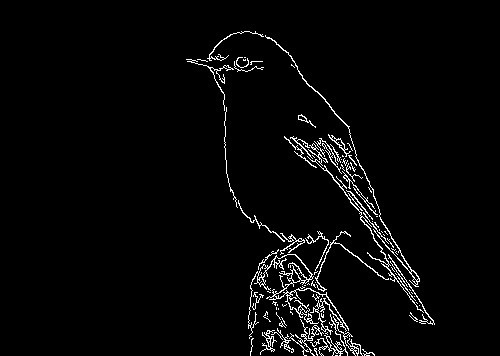

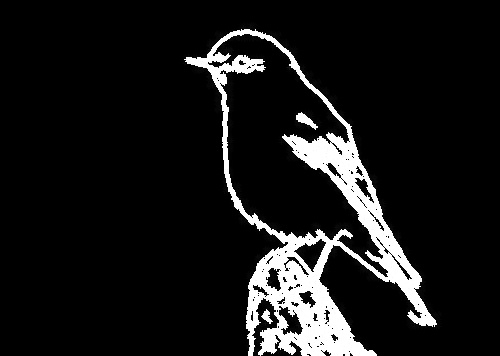

In [68]:
# 画像をグレースケール形式で読み込む。
sample1= "sample1.jpg"
img = cv2.imread(sample1, cv2.IMREAD_GRAYSCALE)
imshow(img)
# 2値画像を収縮する。
dst = cv2.dilate(img, cross_kernel)
imshow(dst)

In [69]:
## ●収縮処理
カーネルを走査していき、カーネル中央の画像の輝度値を、近傍領域の最小輝度で置換する(黒に変換)。
→ノイズ除去に応用

SyntaxError: invalid character in identifier (<ipython-input-69-50f9570f6fd2>, line 2)

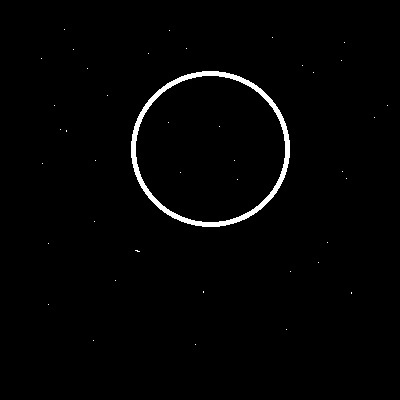

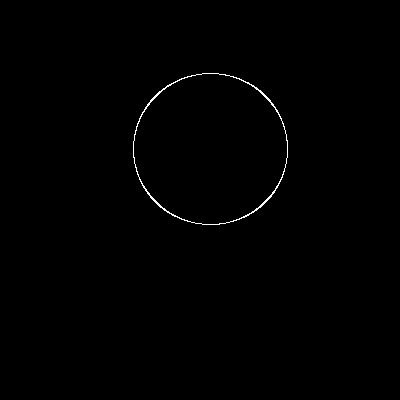

In [70]:
sample2= "sample2.jpg"
img = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)
dst = cv2.erode(img, cross_kernel)
imshow(img)
imshow(dst)

In [71]:
## ◆オープニング・クロージング
<オープニング>
収縮処理の繰り返し後、同回数だけ膨張処理

<クロージング>
膨張処理の繰り返し後、同回数だけ収縮処理

SyntaxError: invalid syntax (<ipython-input-71-0d600687daad>, line 2)

In [72]:
## ●オープニング

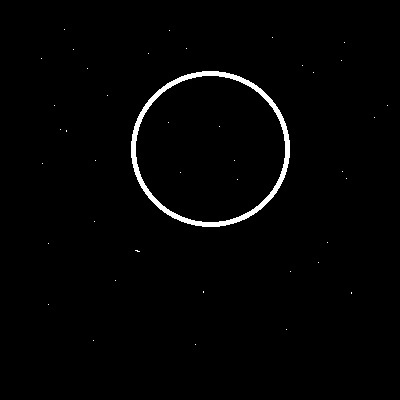

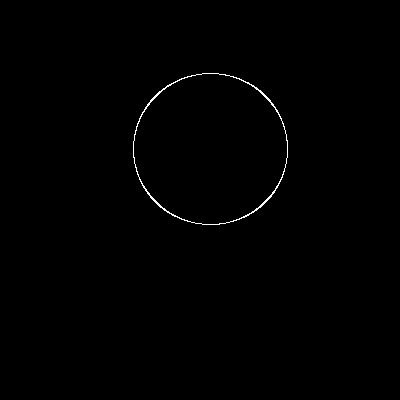

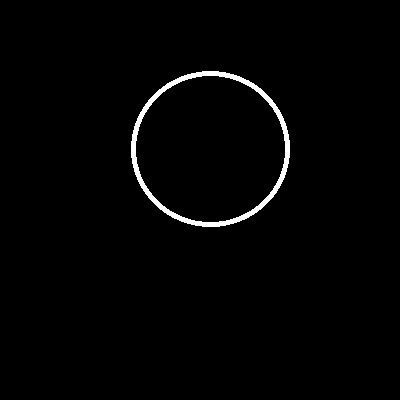

In [73]:
# 画像をグレースケール形式で読み込む。
sample2= "sample2.jpg"
img = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)
# カーネルを作成する。
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
imshow(img)

#収縮
dst = cv2.erode(img, cross_kernel)
imshow(dst)
#膨張
dst2 = cv2.dilate(dst, kernel)
imshow(dst2)

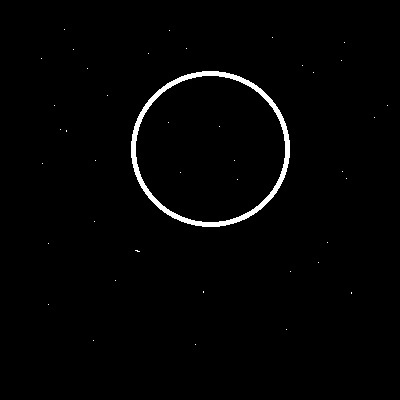

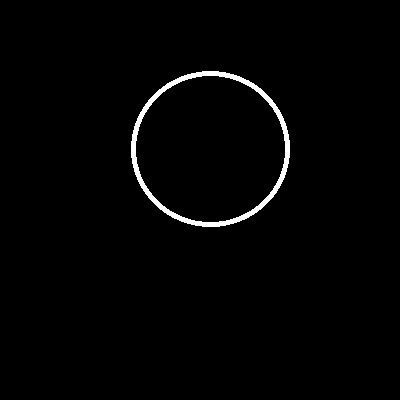

In [74]:
#同様の収縮と膨張の処置を行う関数morphologyEx

#画像読み込み
sample2= "sample2.jpg"
img = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)

#2値画像をオープニング(繰り返し回数1)
dst_1 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)
imshow(img)
imshow(dst_1)

## ●クロージング
(膨張⇒収縮)


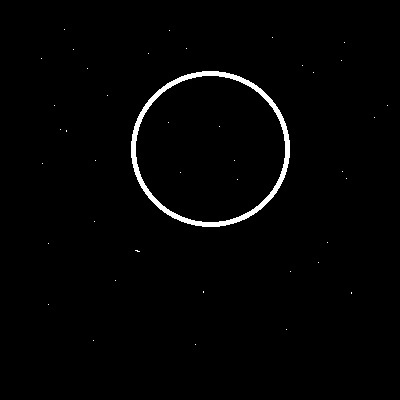

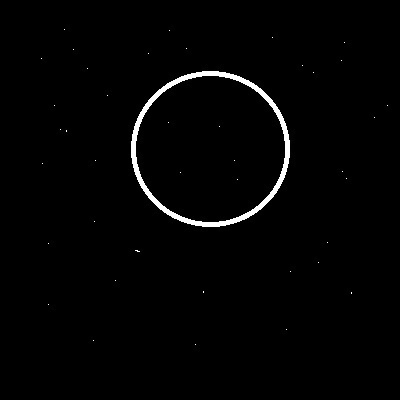

In [76]:
#クロージング(膨張⇒収縮)

#画像読み込み
sample2= "sample2.jpg"
img = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)

#2値画像をクロージング(繰り返し回数1)
dst1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow(img)
imshow(dst1)

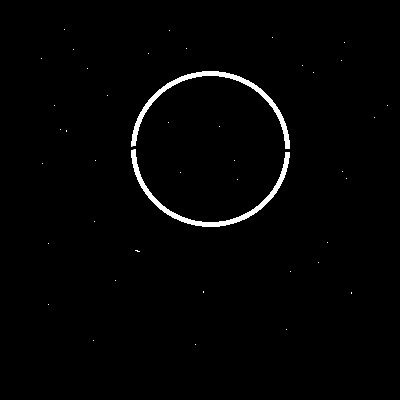

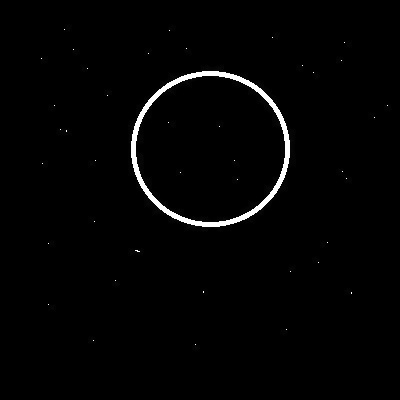

In [77]:
#クロージング(膨張⇒収縮)
#上下に分断された環が結合することに注目
#カーネルをellipse_kernelに変更
#繰り返し回数2回へ変更

#画像読み込み
sample3= "sample3.jpg"
img = cv2.imread(sample3, cv2.IMREAD_GRAYSCALE)

#2値画像をクロージング(繰り返し回数1)
ellipse_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
dst1 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, ellipse_kernel, iterations=2)
imshow(img)
imshow(dst1)

## ●トップハット
入力画像とオープニング処理後画像との差分

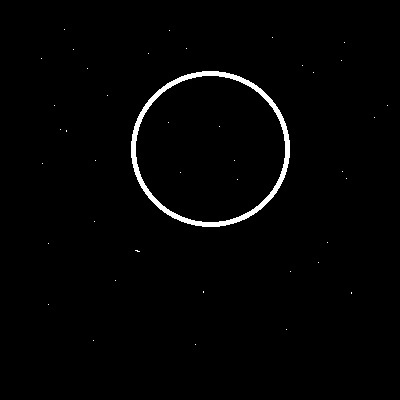

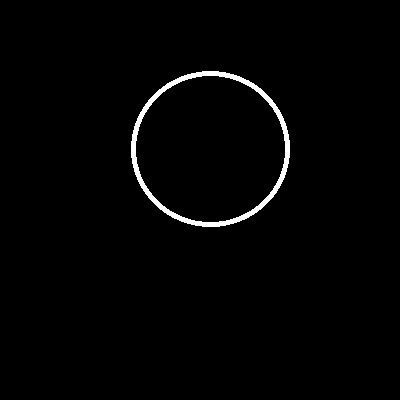

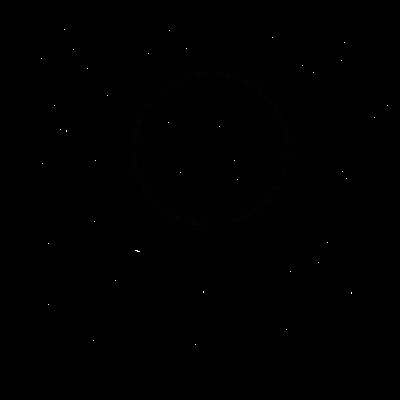

In [79]:
# 画像をグレースケール形式で読み込む。
sample2= "sample2.jpg"
img = cv2.imread(sample2, cv2.IMREAD_GRAYSCALE)

# カーネルを作成する。
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# 2値画像を収縮する。
dst = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel, iterations=2)
imshow(img)
imshow(dst_1)#オープニング処理後画像
imshow(dst)
